In [9]:
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Mapping
import random

# Линейная регрессия на плоскости

In [10]:
log = list()

def SGD_Dataset2D(x_train: np.ndarray, y_train: np.ndarray,
           a: np.ndarray, b: np.ndarray,
            count_epochs:int, size_dataset:int, size_batch:int, count_batch:int,
           lr: float = 0.01) -> Tuple [np.float128, np.float128, np.float128]:
  log.append([a, b])
  for c_e in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for c_b in range(count_batch - 1):
      x_batch = x_train[c_b * size_batch : (c_b + 1) * size_batch]
      y_batch = y_train[c_b * size_batch : (c_b + 1) * size_batch]
      a_grad = -2 * (y_batch - a - b * x_batch).mean()
      b_grad = -2 * (x_batch * (y_batch - a - b * x_batch)).mean()
      
      a -= lr * a_grad
      b -= lr * b_grad

      log.append([a.copy(), b.copy()])
  return (a, b)

In [11]:
_dataset, y = make_blobs(n_samples=100, centers=3, n_features=1, random_state=0) #генерация датасета
x_train = np.array(list(map(list, zip(*_dataset)))[0])
_size_dataset = _dataset.shape[0]
answer_a =  np.random.randn(1)[0]
answer_b =  np.random.randn(1)[0]
y_train = answer_b * x_train + answer_a #y = a + bx,  
y_train +=  1 * np.random.normal(scale=0.3, size=_size_dataset) #добавление шума
_count_epochs = 10000
_size_batch = 20
_count_batch = _size_dataset // _size_batch
print("y = ", answer_a, " * x + ", answer_b) #прямая, вдоль которой (+шум) генерируются точки

y =  0.7462233209454938  * x +  -2.1373692324859905


In [12]:
log.clear()
_a, _b = SGD_Dataset2D(x_train, y_train, 0.5, 0.5, _count_epochs, _size_dataset, _size_batch, _count_batch)
print("~y = ", _a, " * x + ", _b ) #прямая, которую нашла сгд

~y =  0.7599422446449041  * x +  -2.1571203547482667


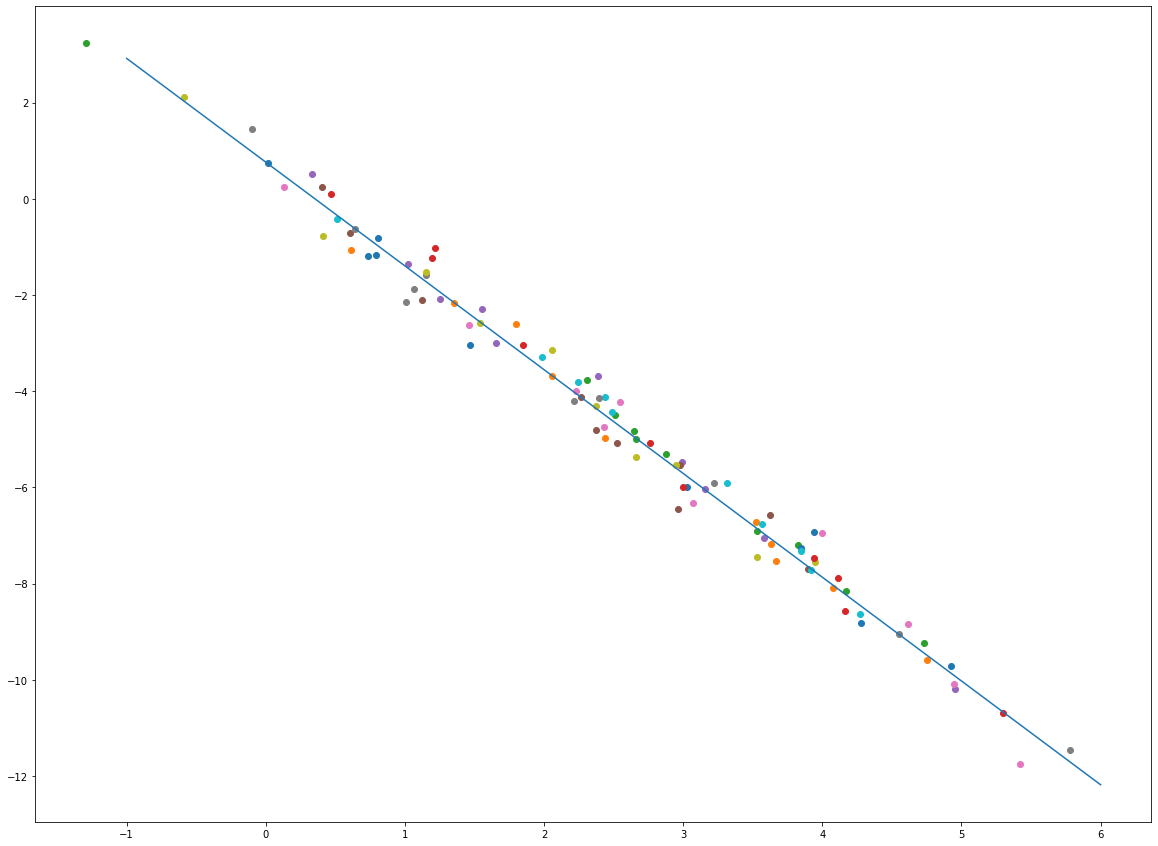

In [13]:
plt.figure(figsize=(20, 15))
x_points = np.linspace(-1, 6, 2)
plt.plot(x_points, _b * x_points + _a, label=r'$f_1(x)=\sin(x)$')
for i in range(_size_dataset):
  plt.scatter(x_train[i], y_train[i])